In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import os

In [2]:
os.chdir("C:\\Users\\Admin\\Desktop\\dataset")

In [3]:
df=pd.read_csv("C:\\Users\\Admin\\Desktop\\dataset\\german_credit_data.csv")

In [4]:
df.isnull().sum()

Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
dtype: int64

In [5]:
df.drop("Checking account",axis="columns",inplace=True)

In [6]:
df.corrwith(df["Credit amount"],axis=0)#data corelation with each other 

Unnamed: 0       0.013488
Age              0.032716
Job              0.285385
Credit amount    1.000000
Duration         0.624984
dtype: float64

In [7]:
df.isnull().sum()

Unnamed: 0           0
Age                  0
Sex                  0
Job                  0
Housing              0
Saving accounts    183
Credit amount        0
Duration             0
Purpose              0
dtype: int64

In [8]:
df["Saving accounts"].fillna(method='bfill',inplace=True)

In [9]:
df.corrwith(df["Credit amount"],axis=0)#checking corelation with each other

Unnamed: 0       0.013488
Age              0.032716
Job              0.285385
Credit amount    1.000000
Duration         0.624984
dtype: float64

In [10]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
dfe=df.copy()
dfe["Sex"]=le.fit_transform(dfe["Sex"])
dfe["Housing"]=le.fit_transform(dfe["Housing"])
dfe["Saving accounts"]=le.fit_transform(dfe["Saving accounts"])



In [11]:
dfel=df.copy()
dfe.drop("Purpose",axis='columns',inplace=True)

In [12]:
df.corrwith(df["Credit amount"],axis=0)

Unnamed: 0       0.013488
Age              0.032716
Job              0.285385
Credit amount    1.000000
Duration         0.624984
dtype: float64

In [13]:
dfel.columns

Index(['Unnamed: 0', 'Age', 'Sex', 'Job', 'Housing', 'Saving accounts',
       'Credit amount', 'Duration', 'Purpose'],
      dtype='object')

In [14]:
dfel=df.copy()
dfel.drop('Saving accounts',axis=1,inplace=True)
dfel.job=dfel.Job.astype(str)
dfel=dfel[['Job','Sex','Age','Credit amount','Duration','Housing','Purpose']]
X1=pd.get_dummies(dfel)
X1.head()
#with the help of get dummies we have encoded the column feilds and converted 
# the values from column to row


C:\Users\Admin\AppData\Local\Temp\ipykernel_14104\3507200728.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  dfel.job=dfel.Job.astype(str)


,Job,Age,Credit amount,Duration,Sex_female,Sex_male,Housing_free,Housing_own,Housing_rent,Purpose_business,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
0,2,67,1169,6,0,1,0,1,0,0,0,0,0,0,1,0,0
1,2,22,5951,48,1,0,0,1,0,0,0,0,0,0,1,0,0
2,1,49,2096,12,0,1,0,1,0,0,0,0,1,0,0,0,0
3,2,45,7882,42,0,1,1,0,0,0,0,0,0,1,0,0,0
4,2,53,4870,24,0,1,1,0,0,0,1,0,0,0,0,0,0


<AxesSubplot:xlabel='Housing', ylabel='count'>

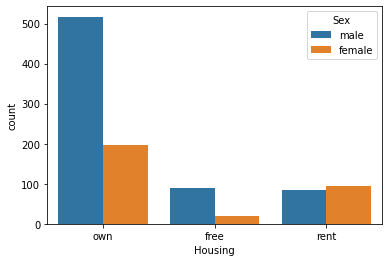

In [15]:
sns.countplot(x="Housing",data=df,hue="Sex")

In [16]:
from sklearn.preprocessing import normalize
X=normalize(X1)


In [17]:
X

array([[1.70803411e-03, 5.72191426e-02, 9.98345936e-01, ...,
        8.54017054e-04, 0.00000000e+00, 0.00000000e+00],
       [3.36064709e-04, 3.69671180e-03, 9.99960541e-01, ...,
        1.68032354e-04, 0.00000000e+00, 0.00000000e+00],
       [4.76960887e-04, 2.33710835e-02, 9.99710020e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [2.48449889e-03, 4.72054789e-02, 9.98768553e-01, ...,
        1.24224944e-03, 0.00000000e+00, 0.00000000e+00],
       [1.08360330e-03, 1.24614379e-02, 9.99624040e-01, ...,
        5.41801648e-04, 0.00000000e+00, 0.00000000e+00],
       [4.37034126e-04, 5.89996070e-03, 9.99934079e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


ValueError: x and y must have same first dimension, but have shapes (19,) and (0,)

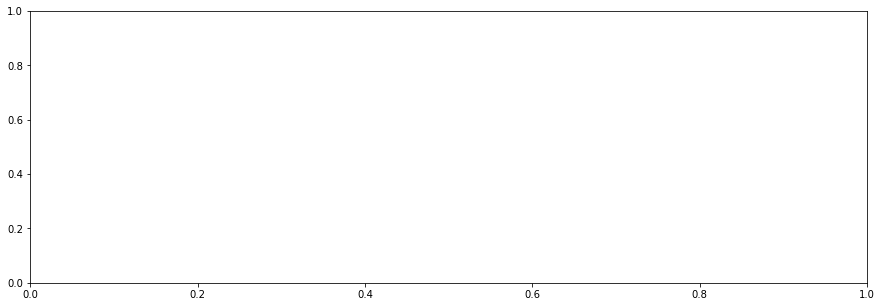

In [18]:
distorsions=[]
for k in range(1,20):
    kmeans=KMeans(n_clusters=k)
    kmeans.fit(X)
    
fig=plt.figure(figsize=(15,5))
plt.plot(range(1,20),distorsions)
plt.grid(True)
plt.title("Elbow curve")

In [ ]:
from sklearn.cluster import KMeans
km=KMeans(n_clusters=5,max_iter=10000,random_state=None)
km.fit_transform(X)

In [ ]:
km.score(X)

The k-means score is an indication of how far the points are from the centroids. In scikit learn, the score is better the closer to zero it is.

Bad scores will return a large negative number, whereas good scores return close to zero. Generally, you will want to take the absolute value of the output from the scores method for better visualization.


In [ ]:
from sklearn.metrics import silhouette_score
silhouette_score(X,km.labels_)

The Silhouette Coefficient is calculated using the mean intra-cluster distance (a) and the mean nearest-cluster distance (b) for each sample. The Silhouette Coefficient for a sample is (b - a) / max(a, b). To clarify, b is the distance between a sample and the nearest cluster that the sample is not a part of. Note that Silhouette Coefficient is only defined if number of labels is 2 <= n_labels <= n_samples - 1.

The best value is 1 and the worst value is -1. Values near 0 indicate overlapping clusters. Negative values generally indicate that a sample has been assigned to the wrong cluster, as a different cluster is more similar.

In [ ]:
from mpl_toolkits.mplot3d import Axes3D


In [ ]:
df_cluster=pd.DataFrame()
df_cluster['Credit amount']=df['Credit amount']
df_cluster['Age']=df['Age']
df_cluster['Job']=df['Job']
df_cluster['Duration']=df['Duration']

df_cluster.head()

In [ ]:
model=KMeans(n_clusters=5)
model.fit(X)
kmeans_labels=model.labels_

fig=plt.figure(num=None,figsize=(15,20),dpi=80,facecolor='w',edgecolor='k')
ax=plt.axes(projection='3d')

ax.scatter3D(df_cluster['Age'],df_cluster['Credit amount'],df_cluster['Duration'],c=kmeans_labels,cmap='rainbow')

In [ ]:
df_clustered_kmeans=df_cluster.assign(Cluster=kmeans_labels)
grouped_kmeans=df_clustered_kmeans.groupby(['Cluster']).mean().round(1)

In [ ]:
grouped_kmeans

In [ ]:
#Dendrogram
import scipy.cluster.hierarchy as sch

In [ ]:
plt.figure(figsize=(20,10))
dendrogram=sch.dendrogram(sch.linkage(X,method='ward'))